In [1]:
%cd ~/NetBeansProjects/ExpLosion/
from itertools import chain
from notebooks.common_imports import *
from gui.output_utils import *
from gui.user_code import pretty_names

sns.timeseries.algo.bootstrap = my_bootstrap
sns.categorical.bootstrap = my_bootstrap

/Users/miroslavbatchkarov/NetBeansProjects/ExpLosion


In [2]:
d = {'expansions__vectors__rep': 0, 
    'expansions__k':3,
    'labelled':'amazon_grouped-tagged',
    'expansions__use_similarity': 0, 
    'expansions__neighbour_strategy':'linear',
    'expansions__vectors__dimensionality': 100, 
    'document_features_ev': 'AN+NN', 
    'document_features_tr': 'J+N+AN+NN', 
    'expansions__allow_overlap': False,
    'expansions__entries_of': None,
    'expansions__vectors__algorithm': 'word2vec',
    'expansions__vectors__composer': 'Add',
    'expansions__vectors__unlabelled__in': ['wiki', 'cwiki'],
    'expansions__decode_handler': 'SignifiedOnlyFeatureHandler',
    'expansions__noise': 0}
unconstrained_ids = Experiment.objects.filter(**d).values_list('id', flat=True)

constrained_ids = Experiment.objects.filter(expansions__entries_of__isnull=False,
                                                expansions__entries_of__unlabelled_percentage__in=[1, 10],
                                                expansions__vectors__composer='Add').values_list('id', flat=True)

In [3]:
names = {'percent':'expansions__vectors__unlabelled_percentage',
#          'reduced_to':'expansions__entries_of__unlabelled_percentage',
#         'composer':'expansions__vectors__composer',
        'Corpus':'expansions__vectors__unlabelled'}
# df = dataframe_from_exp_ids(list(constrained_ids) + list(unconstrained_ids), names).convert_objects(convert_numeric=True)
df = dataframe_from_exp_ids(unconstrained_ids, names).convert_objects(convert_numeric=True)

folds has 10000 values
percent has 10000 values
Accuracy has 10000 values
Corpus has 10000 values


In [4]:
df.head()

,Accuracy,Corpus,folds,percent
0,0.516205,wiki,0,100
1,0.516550,wiki,1,100
2,0.517172,wiki,2,100
3,0.518278,wiki,3,100
4,0.519384,wiki,4,100


In [5]:


# put together a legible name for the method
def legible_name(row):
    if row.unlab == 'cwiki':
        return 'clean wiki (Add)'
    else:
        if np.isnan(row.reduced_to):
            return 'wiki (%s)'%row.composer
        else:
            return 'wiki 100 --> wiki %d (%s)'%(row.reduced_to, row.composer)
    
df['Tokens'] = df.apply(compute_token_count, axis=1)
# df['name'] = df.apply(legible_name, axis=1)
df = df.drop('percent', axis=1)

In [6]:
df.head()

,Accuracy,Corpus,folds,Tokens
0,0.516205,wiki,0,1500000000
1,0.516550,wiki,1,1500000000
2,0.517172,wiki,2,1500000000
3,0.518278,wiki,3,1500000000
4,0.519384,wiki,4,1500000000


/Users/miroslavbatchkarov/anaconda/envs/py3k/lib/python3.3/site-packages/matplotlib/backends/backend_pdf.py:2184: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  different = bool(ours != theirs)

  different = bool(ours != theirs)



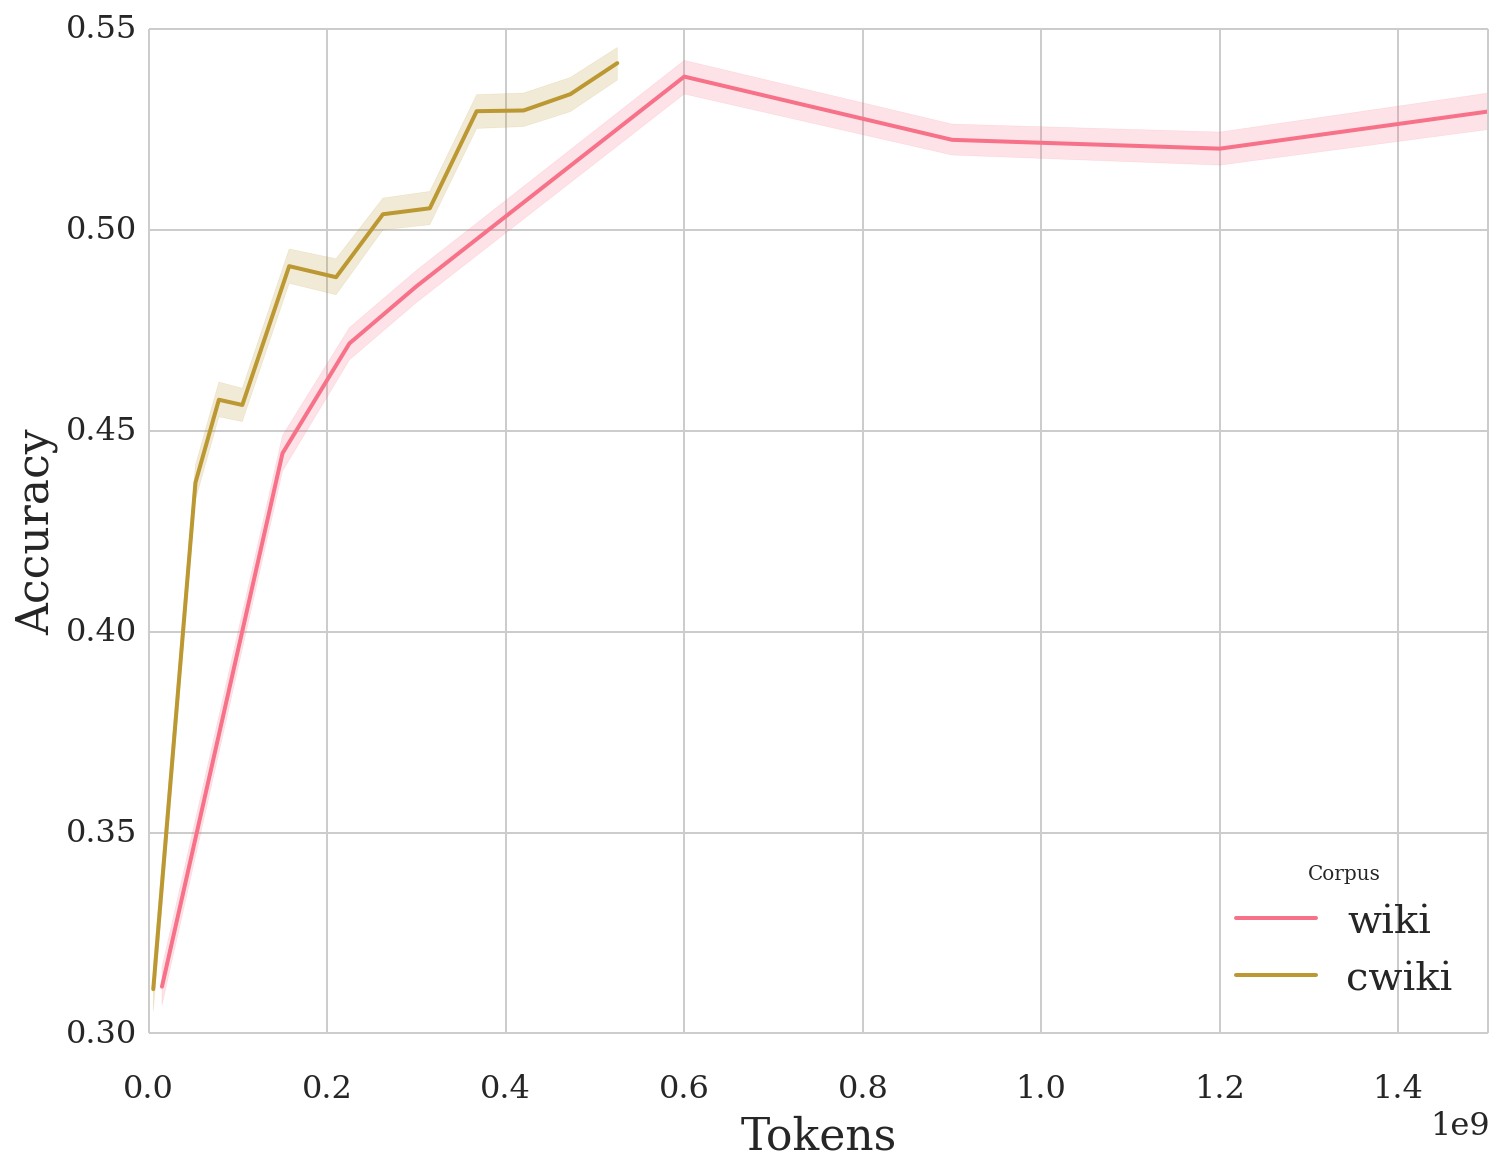

In [7]:
with sns.color_palette("husl", 6):
    ax = sns.tsplot(df, time='Tokens', unit='folds', condition='Corpus', value='Accuracy')
ax.set_xlim(0, df.Tokens.max());
plt.savefig('plot-w2v-learning-curve-amazon-cwiki-vs-wiki.pdf', format='pdf', dpi=300, bbox_inches='tight', pad_inches=0.1)